In [284]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [285]:
# Create a SQL connection to our SQLite database
con = sqlite3.connect("basketball.sqlite")

In [286]:
df_players = pd.read_sql_query('SELECT *, AVG(value) AS salary FROM Player_Salary INNER JOIN Player_Attributes ON Player_Salary.namePlayer = Player_Attributes.DISPLAY_FIRST_LAST GROUP BY namePlayer',con)

In [287]:
df_players.isna().sum()

slugSeason                            0
nameTeam                              0
namePlayer                            0
statusPlayer                          0
isFinalSeason                         0
isWaived                              0
isOnRoster                            0
isNonGuaranteed                       0
isTeamOption                          0
isPlayerOption                        0
typeContractDetail                    0
value                                 0
ID                                    0
FIRST_NAME                            0
LAST_NAME                             0
DISPLAY_FIRST_LAST                    0
DISPLAY_LAST_COMMA_FIRST              0
DISPLAY_FI_LAST                       0
PLAYER_SLUG                           0
BIRTHDATE                             0
SCHOOL                                0
COUNTRY                               0
LAST_AFFILIATION                      0
HEIGHT                                0
WEIGHT                                0


<b> Delete columns columns </b>

In [288]:
df_players.drop(['ALL_STAR_APPEARANCES','PIE'],inplace=True,axis = 1)

<h3> Find the top 10 countries where most players come from (except the USA). </h3>

<AxesSubplot:>

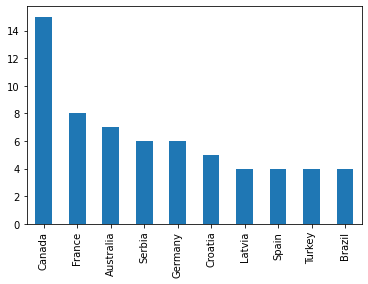

In [289]:
most_foreigners = df_players['COUNTRY'].value_counts()[1:11]
most_foreigners.plot(kind='bar')

<h3> Player's positions ratio </h3>

<AxesSubplot:>

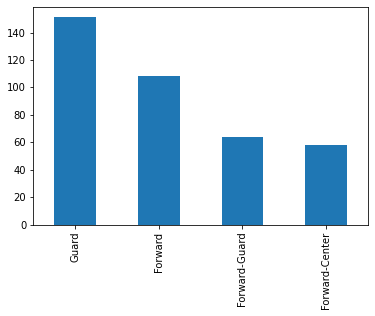

In [290]:
df_players['POSITION'].replace('Guard-Forward','Forward-Guard',inplace=True)
df_players['POSITION'].replace('Center-Forward','Forward-Center',inplace=True)
df_players['POSITION'].value_counts()[:-1].plot(kind='bar')

<h3> Average career lifespan </h3>

(array([ 84., 103.,  68.,  30.,  48.,  28.,  16.,  21.,  10.,   7.]),
 array([ 0. ,  1.7,  3.4,  5.1,  6.8,  8.5, 10.2, 11.9, 13.6, 15.3, 17. ]),
 <BarContainer object of 10 artists>)

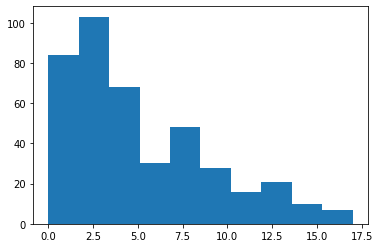

In [291]:
plt.hist(df_players['SEASON_EXP'])

In [292]:
"{:.1f}".format(df_players['SEASON_EXP'].mean())

'5.2'

<h3> Teams which had most players in their team </h3>

<AxesSubplot:>

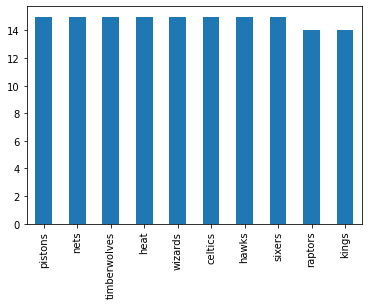

In [293]:
df_players['TEAM_CODE'].value_counts()[1:11].plot(kind='bar')

<h3> Most PPG APG and RPG </h3>

In [294]:
df_players[['DISPLAY_FI_LAST','PTS']].sort_values(by = 'PTS',ascending=False)[:10]

,DISPLAY_FI_LAST,PTS
36,B. Beal,31.8
77,D. Lillard,30.1
207,J. Embiid,29.9
147,G. Antetokounmpo,29.0
366,S. Curry,29.0
269,L. Doncic,29.0
244,K. Durant,29.0
411,Z. LaVine,28.2
259,K. Irving,28.1
314,N. Jokic,27.1


In [295]:
df_players[['DISPLAY_FI_LAST','AST']].sort_values(by = 'AST',ascending=False)[:10]

,DISPLAY_FI_LAST,AST
183,J. Harden,11.2
352,R. Westbrook,10.3
388,T. Young,9.4
269,L. Doncic,9.2
62,C. Paul,8.8
314,N. Jokic,8.6
117,D. Green,8.4
265,L. James,7.9
77,D. Lillard,7.7
28,B. Simmons,7.6


In [296]:
df_players[['DISPLAY_FI_LAST','REB']].sort_values(by = 'REB',ascending=False)[:10]

,DISPLAY_FI_LAST,REB
65,C. Capela,14.2
15,A. Drummond,13.5
350,R. Gobert,13.4
213,J. Valanciunas,12.3
147,G. Antetokounmpo,11.7
315,N. Vucevic,11.7
129,E. Kanter,11.6
207,J. Embiid,11.5
314,N. Jokic,11.3
114,D. Sabonis,11.2


<h3> Highest and heaviest players </h3>

In [297]:
df_players[['DISPLAY_FI_LAST','WEIGHT']].sort_values(by = 'WEIGHT',ascending=False)[:10]

,DISPLAY_FI_LAST,WEIGHT
370,T. Fall,311.0
31,B. Marjanovic,290.0
233,J. Nurkic,290.0
314,N. Jokic,284.0
413,Z. Williamson,284.0
41,B. Lopez,282.0
343,R. Lopez,281.0
207,J. Embiid,280.0
15,A. Drummond,279.0
14,A. Varejao,273.0


In [298]:
df_players[['DISPLAY_FI_LAST','HEIGHT']].sort_values(by = 'HEIGHT',ascending=False)[:10]

,DISPLAY_FI_LAST,HEIGHT
370,T. Fall,89.0
31,B. Marjanovic,88.0
254,K. Porzingis,87.0
305,M. Brown,86.0
272,L. Kornet,86.0
22,A. Pasecniks,85.0
350,R. Gobert,85.0
178,J. Poeltl,85.0
0,A. Hammons,84.0
166,I. Zubac,84.0


<h3> Corroletion between height and weight </h3>

In [299]:
df_players[['HEIGHT','WEIGHT']].corr()

,HEIGHT,WEIGHT
HEIGHT,1.000000,0.786299
WEIGHT,0.786299,1.000000


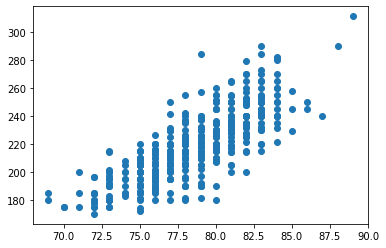

In [300]:
plt.scatter(df_players['HEIGHT'],df_players['WEIGHT'])

<b> As can be seen, there is a moderate correlation between weight and height. </b>

<h3> Corroletion between Points and experience </h3>

In [301]:
df_players[['PTS','SEASON_EXP']].corr()

,PTS,SEASON_EXP
PTS,1.00000,0.25293
SEASON_EXP,0.25293,1.00000


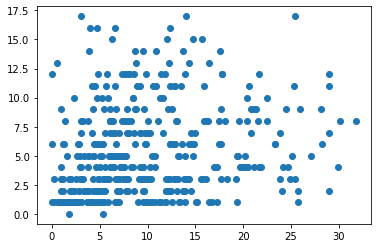

In [302]:
plt.scatter(df_players['PTS'],df_players['SEASON_EXP'])

<b> As can be seen, there is a low correlation between Points and experience. </b>

<h3> Corroletion between Height and Rebound </h3>

In [303]:
df_players[['HEIGHT','REB']].corr()

,HEIGHT,REB
HEIGHT,1.000000,0.447841
REB,0.447841,1.000000


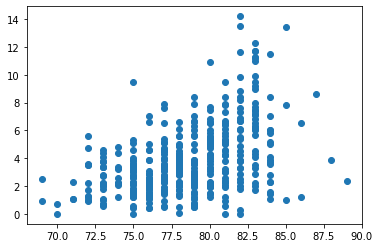

In [304]:
plt.scatter(df_players['HEIGHT'],df_players['REB'])

<b> As can be seen, there is low correlation between height and rebound  </b>

<h3> Corroletion between salary and experience </h3>

In [305]:
df_players[['SEASON_EXP','salary']].corr()

,SEASON_EXP,salary
SEASON_EXP,1.000000,0.377478
salary,0.377478,1.000000


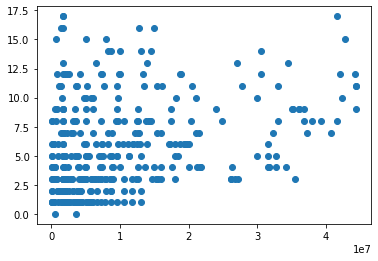

In [306]:
plt.scatter(df_players['salary'],df_players['SEASON_EXP'])

<b> There is low correlation between salary and experience </b>

<h3> Corroletion between points and salary </h3>

In [307]:
df_players[['PTS','salary']].corr()

,PTS,salary
PTS,1.00000,0.77095
salary,0.77095,1.00000


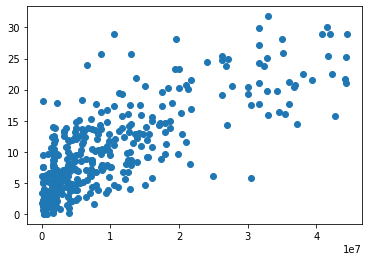

In [308]:
plt.scatter(df_players['salary'],df_players['PTS'])

<b> There is a high correlation between salary and points </b>